In [ ]:
import pandas as pd
data1=pd.read_excel('附件一（训练集）.xlsx',sheet_name='材料1')
data2=pd.read_excel('附件一（训练集）.xlsx',sheet_name='材料2')
data3=pd.read_excel('附件一（训练集）.xlsx',sheet_name='材料3')
data4=pd.read_excel('附件一（训练集）.xlsx',sheet_name='材料4')

# data1.head()
data = pd.concat([data1, data2, data3, data4], axis=0)

# 查看是否有缺失值
missing_values_data1 = data1.isnull().sum()
missing_values_data2 = data2.isnull().sum()
missing_values_data3 = data3.isnull().sum()
missing_values_data4 = data4.isnull().sum()

missing_values_data1, missing_values_data2, missing_values_data3, missing_values_data4

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
data = pd.read_csv('data.csv')
# 设置中文字体支持和绘图参数
plt.rcParams['font.sans-serif'] = ['SimHei']  # 中文支持
plt.rcParams['axes.unicode_minus'] = False

# 假设 'data' 是已经定义好的包含数据的 DataFrame
X = data[data.columns[5:]]  # 提取从第5列开始的数据
X = X.T  # 转置

# 需要可视化的列
columns_to_visualize = [0, 100]

# 定义图形大小
plt.figure(figsize=(12, 5))

# 遍历列进行可视化
for i, col in enumerate(columns_to_visualize):
    plt.subplot(1, 2, i+1)
    
    # 绘制该列的箱线图，设置较小的箱子宽度
    sns.boxplot(data=X[col], width=0.3, color='#f57c6e')
    
    # 设置标题
    plt.title(f'第{col}个样本的箱线图')
    plt.xlabel(f'样本 {col}')
    plt.ylabel('值')

# 调整布局以避免子图重叠
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
import numpy as np
from scipy.signal import find_peaks
from scipy.fftpack import fft
from scipy.stats import kurtosis, skew

# 提取从第5列开始的数据并转置
X = data[data.columns[5:]].T

# 定义时域特征提取函数
def extract_time_features(data_row):
    mean_value = np.mean(data_row)
    std_dev = np.std(data_row)
    variance = np.var(data_row)
    max_value = np.max(data_row)
    min_value = np.min(data_row)
    peak_to_peak = max_value - min_value
    rms = np.sqrt(np.mean(data_row**2))
    crest_factor = max_value / (rms + np.finfo(float).eps)
    kurt = kurtosis(data_row)
    skewness = skew(data_row)
    
    return {
        '均值': mean_value,
        '标准差': std_dev,
        '方差': variance,
        '最大值': max_value,
        '最小值': min_value,
        '峰峰值': peak_to_peak,
        '均方根': rms,
        '波形因子': crest_factor,
        '峰度': kurt,
        '偏度': skewness
    }

# 定义频域特征提取函数
def extract_frequency_features(data_row):
    fft_values = np.abs(fft(data_row))
    freqs = np.fft.fftfreq(len(data_row))
    
    spectral_energy = np.sum(fft_values**2)
    spectral_centroid = np.sum(freqs * fft_values) / np.sum(fft_values)
    spectral_bandwidth = np.sqrt(np.sum(((freqs - spectral_centroid) ** 2) * fft_values) / np.sum(fft_values))
    dominant_frequency = freqs[np.argmax(fft_values)]
    
    normalized_fft = fft_values / np.sum(fft_values)
    spectral_entropy = -np.sum(normalized_fft * np.log2(normalized_fft + np.finfo(float).eps))
    spectral_flatness = np.exp(np.mean(np.log(fft_values + np.finfo(float).eps))) / np.mean(fft_values)
    
    return {
        '频谱能量': spectral_energy,
        '频谱质心': spectral_centroid,
        '频谱带宽': spectral_bandwidth,
        '主频率': dominant_frequency,
        '频谱熵': spectral_entropy,
        '频谱平坦度': spectral_flatness
    }

# 统一特征提取函数
def extract_all_features(row):
    time_features = extract_time_features(row)
    frequency_features = extract_frequency_features(row)
    
    # 结合时域和频域特征
    return pd.Series({**time_features, **frequency_features})

# 应用特征提取到数据集
extracted_features = X.apply(extract_all_features, axis=1)

# 将提取的特征与原始数据框合并
data_with_features = pd.concat([data, extracted_features], axis=1)

# 输出包含新特征的数据框
data_with_features.head()

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# 假设 'data' 是包含数据的 DataFrame
X = data[data.columns[6:]]

# 数据标准化
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 进行PCA降维
pca = PCA(n_components=10)
pca.fit(X)

# 获取每个主成分的方差贡献度
explained_variance_ratio = pca.explained_variance_ratio_

# 绘制方差贡献度的柱状图
plt.figure(figsize=(8, 6))
sns.barplot(x=np.arange(1, len(explained_variance_ratio) + 1), y=explained_variance_ratio, color='#FF8C00')

# 设置标题和标签
plt.title('主成分方差贡献度', fontsize=14)
plt.xlabel('主成分', fontsize=12)
plt.ylabel('方差贡献度', fontsize=12)

# 显示图表
plt.show()


In [ ]:
X=data[data.columns[6:]]
pca = PCA(n_components=3)
pca.fit(X)
sum(pca.explained_variance_ratio_)
newX=pca.fit_transform(X)

data.insert(5, 'X1', newX[:,0])
data.insert(6, 'X2', newX[:,1])
data.insert(7, 'X3', newX[:,2])

# 创建子图布局
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# 1. 绘制 X1 的密度图
sns.kdeplot(x='X1', hue='励磁波形', data=data, fill=True, palette='coolwarm', ax=axes[0])
axes[0].set_title('特征X1在不同励磁波形下的密度分布')
axes[0].set_xlabel('X1')
axes[0].set_ylabel('密度')

# 2. 绘制 X2 的密度图
sns.kdeplot(x='X2', hue='励磁波形', data=data, fill=True, palette='coolwarm', ax=axes[1])
axes[1].set_title('特征X2在不同励磁波形下的密度分布')
axes[1].set_xlabel('X2')
axes[1].set_ylabel('密度')

# 3. 绘制 X3 的密度图
sns.kdeplot(x='X3', hue='励磁波形', data=data, fill=True, palette='coolwarm', ax=axes[2])
axes[2].set_title('特征X3在不同励磁波形下的密度分布')
axes[2].set_xlabel('X3')
axes[2].set_ylabel('密度')

plt.tight_layout()
plt.show()


In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

# 设置3D绘图
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# 绘制3D散点图
scatter = ax.scatter(data['X1'], data['X2'], data['X3'], c=data['励磁波形'].apply(lambda x: {'正弦波': '#FF6A6A', '三角波': '#FFFF00', '梯形波': '#00EE76'}[x]), s=50, alpha=0.7)

# 设置标题和坐标轴标签
ax.set_title('X1, X2 和 X3 之间的关系（按励磁波形分类）')
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('X3')

# 创建图例
legend_labels = {'#f57c6e': '正弦波', '#f2b56f': '三角波', '#fae69e': '梯形波'}
handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=10) for color in legend_labels]
ax.legend(handles, legend_labels.values(), title="励磁波形")

plt.show()
import seaborn as sns
import matplotlib.pyplot as plt

# 绘制 X1, X2, X3 三个特征的 pairplot 散点图
sns.pairplot(data[['X1', 'X2', 'X3', '励磁波形']], hue='励磁波形', palette={'正弦波': '#f57c6e', '三角波': '#f2b56f', '梯形波': '#fae69e'})
  
# 显示图表
plt.show()


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    accuracy_score, recall_score, f1_score, confusion_matrix, classification_report, roc_curve, auc,
    roc_auc_score
)
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
import xgboost as xgb
import matplotlib.pyplot as plt
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
import seaborn as sns

# 设置字体
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

# 数据准备
X = data[['均值', '标准差', '方差', '最大值', '最小值', '峰峰值', '均方根', '波形因子', '峰度', '偏度',
          '频谱能量', '频谱质心', '频谱带宽', '主频率', '频谱熵', '频谱平坦度']]
Y = data['励磁波形'].copy()

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=20)

# 模型训练
model = RandomForestClassifier(n_estimators=100, max_depth=3, random_state=20)
model.fit(X_train, Y_train)

# 预测
Y_pred = model.predict(X_test)

# 计算评估指标
accuracy = accuracy_score(Y_test, Y_pred)
recall = recall_score(Y_test, Y_pred, average='macro')
f1 = f1_score(Y_test, Y_pred, average='macro')
cm = confusion_matrix(Y_test, Y_pred)

# 输出评估指标
print(f'准确率: {accuracy:.4f}')
print(f'召回率: {recall:.4f}')
print(f'F1 分数: {f1:.4f}')
print('混淆矩阵:')
print(cm)
print('分类报告:')
print(classification_report(Y_test, Y_pred))

# 绘制混淆矩阵图
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('混淆矩阵')
plt.xlabel('预测值')
plt.ylabel('真实值')
plt.show()

# 绘制多分类ROC曲线
Y_test_binarized = label_binarize(Y_test, classes=np.unique(Y))
n_classes = Y_test_binarized.shape[1]

# 使用 OneVsRestClassifier 进行多分类
classifier = OneVsRestClassifier(model)
classifier.fit(X_train, Y_train)
Y_score = classifier.predict_proba(X_test)

# 处理无效值，将 NaN 或 inf 替换为 0
Y_score = np.nan_to_num(Y_score)

fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(Y_test_binarized[:, i], Y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# 绘制多分类ROC曲线
plt.figure(figsize=(8, 6))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label=f'类别 {i} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('多分类 ROC 曲线')
plt.legend(loc="lower right")
plt.show()

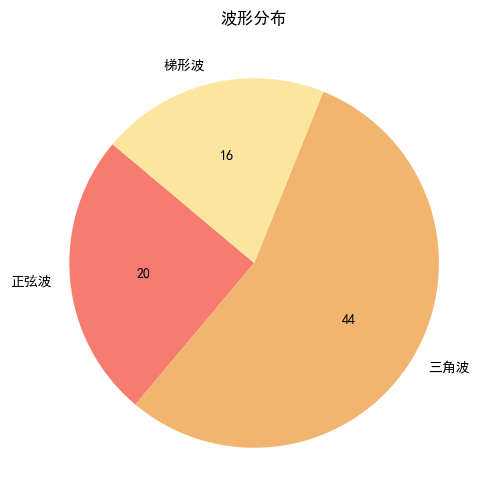

In [4]:
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif']=['SimHei'] 
plt.rcParams['axes.unicode_minus']=False


# 数据
labels = ['正弦波', '三角波', '梯形波']
sizes = [20, 44, 16]
colors = ['#f57c6e', '#f2b56f', '#fae69e']

# 自定义显示数值的函数
def autopct_formatter(values):
    def my_format(pct):
        total = sum(values)
        val = int(round(pct * total / 100.0))
        return f'{val}'
    return my_format

# 创建饼图
plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, colors=colors, autopct=autopct_formatter(sizes), startangle=140)

# 添加标题
plt.title('波形分布')

# 显示饼图
plt.show()

In [6]:
import  pandas as pd
data = pd.read_csv(r'D:\数模\新建文件夹\新建文件夹\data_.csv')

data.columns

Index(['均值', '标准差', '方差', '最大值', '最小值', '峰峰值', '均方根', '波形因子', '峰度', '偏度',
       ...
       '1014', '1015', '1016', '1017', '1018', '1019', '1020', '1021', '1022',
       '1023'],
      dtype='object', length=1047)

In [ ]:
import random
from deap import base, creator, tools, algorithms
import numpy as np

# 目标是最小化 F = P / (Bm * f)
def objective_function(individual):
    T, f, shape, Bm, material = individual  # 解包五个变量

    # 计算公式，计算 P
    P = np.sqrt(material + (((0.047636 * ((f * (Bm ** 1.275)) - T)) + shape) + material)) - 0.23616
    
    # 计算目标函数 F
    F =  (Bm * f) / P
    return F  # 返回元组

# 创建最小化问题
creator.create("FitnessMin", base.Fitness, weights=(1.0,))  # 目标为最小化 
creator.create("Individual", list, fitness=creator.FitnessMin)

# 定义变量的范围和类型
toolbox = base.Toolbox()

# 决策变量的初始化
toolbox.register("attr_T", random.choice, [25, 50, 70, 90])  # 温度T
toolbox.register("attr_f", random.uniform, 49940, 501180)     # 频率f
toolbox.register("attr_shape", random.choice, [1, 2, 3])      # 波形shape
toolbox.register("attr_Bm", random.uniform, 0.00963815, 0.313284469) # 磁通密度Bm
toolbox.register("attr_material", random.choice, [1, 2, 3, 4]) # 材料material

# 创建个体：一个个体是由5个变量组成的向量
toolbox.register("individual", tools.initCycle, creator.Individual,
                 (toolbox.attr_T, toolbox.attr_f, toolbox.attr_shape, toolbox.attr_Bm, toolbox.attr_material))

# 定义种群
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

# 评估函数
toolbox.register("evaluate", objective_function)

# 遗传算法操作：交叉、变异、选择
# 对于连续变量，使用 cxBlend 和 mutGaussian
def mate_individuals(ind1, ind2):
    # 对连续变量使用 Blend 交叉
    for i in [1, 3]:  # f 和 Bm 是连续变量
        ind1[i] = tools.cxBlend([ind1[i]], [ind2[i]], alpha=0.5)[0]  # 提取标量
        ind2[i] = tools.cxBlend([ind2[i]], [ind1[i]], alpha=0.5)[0]
    # 对离散变量随机交换
    for i in [0, 2, 4]:  # T, shape, material 是离散变量
        if random.random() < 0.5:
            ind1[i], ind2[i] = ind2[i], ind1[i]

def mutate_individual(individual):
    # 对连续变量使用 Gaussian 变异
    for i in [1, 3]:  # f 和 Bm 是连续变量
        individual[i] += random.gauss(0, 1)
    # 对离散变量随机赋值
    individual[0] = random.choice([25, 50, 70, 90])  # T
    individual[2] = random.choice([1, 2, 3])  # shape
    individual[4] = random.choice([1, 2, 3, 4])  # material
    return individual

toolbox.register("mate", mate_individuals)
toolbox.register("mutate", mutate_individual)
toolbox.register("select", tools.selTournament, tournsize=3)

# 运行遗传算法
def main():
    random.seed(42)
    
    # 创建初始种群
    population = toolbox.population(n=100)
    
    # 统计数据
    stats = tools.Statistics(lambda ind: ind.fitness.values)
    stats.register("avg", lambda x: sum(x) / len(x))
    stats.register("min", min)
    stats.register("max", max)

    # 运行遗传算法
    population, logbook = algorithms.eaSimple(population, toolbox, cxpb=0.5, mutpb=0.2, ngen=50, stats=stats, verbose=True)
    
    # 输出最优解
    best_individual = tools.selBest(population, k=1)[0]
    print(f"最优解是: {best_individual}")
    print(f"最小的目标函数值是: {best_individual.fitness.values[0]}")

if __name__ == "__main__":
    main()